In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [4]:
df=pd.read_excel('purchase.xlsx')
df.head()

,Products,Prod_id,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment
0,COPIERS AND FAX,Prod_16,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE
1,COPIERS AND FAX,Prod_16,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE
2,PAPER,Prod_6,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS
3,PAPER,Prod_6,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS
4,OFFICE MACHINES,Prod_17,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5977 entries, 0 to 5976
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Products             5977 non-null   object 
 1   Prod_id              5977 non-null   object 
 2   Cust_id              5977 non-null   object 
 3   Sales                5977 non-null   float64
 4   Order_Quan           5977 non-null   int64  
 5   Profit               5977 non-null   float64
 6   Shipping_Cost        5977 non-null   float64
 7   Product_Base_Margin  5977 non-null   float64
 8   Customer_Segment     5977 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 420.4+ KB


In [5]:
q1=df.quantile(.25)
q3=df.quantile(.75)
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR

df_new=df[~((df<ll)|(df>ul)).any(axis=1)]
df_new.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_14044\2395152139.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new=df[~((df<ll)|(df>ul)).any(axis=1)]


(5192, 9)

In [6]:
df_new.drop(['Prod_id'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14044\754797519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Prod_id'],axis=1,inplace=True)


In [7]:
ss=StandardScaler()
d1=df_new.select_dtypes(include=np.number)
df_std=ss.fit_transform(d1)

In [8]:
wcss=[]
for i in range(1,11):
        km=KMeans(n_clusters=i)
        km.fit(df_std)
        wcss.append(km.inertia_)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

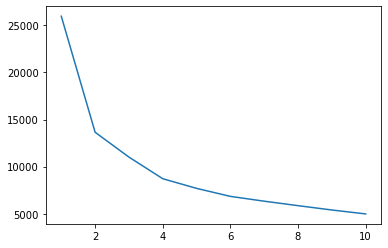

In [9]:
plt.plot(range(1,11),wcss)

In [10]:
km=KMeans(n_clusters=4)
km.fit(df_std)
df_new['Cluster']=km.labels_

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_14044\74056552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cluster']=km.labels_


In [11]:
df_new.head()

,Products,Cust_id,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Customer_Segment,Cluster
0,COPIERS AND FAX,Cust_1088,10909.641,40,2616.46,22.00,0.57,HOME OFFICE,1
1,COPIERS AND FAX,Cust_1820,10607.641,27,2977.36,23.69,0.56,CORPORATE,1
2,PAPER,Cust_1659,754.641,13,29.80,8.90,0.37,SMALL BUSINESS,0
3,PAPER,Cust_622,572.641,22,92.78,10.99,0.39,SMALL BUSINESS,0
4,OFFICE MACHINES,Cust_564,10128.641,50,5133.68,20.50,0.36,SMALL BUSINESS,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

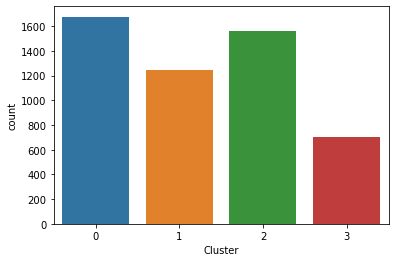

In [12]:
sns.countplot(df_new['Cluster'])

In [14]:
df_new[df_new['Cluster']==0].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0
mean,404.182322,12.838998,9.414431,6.345009,0.414884,0.0
std,951.223447,7.273162,361.042394,5.906917,0.077980,0.0
min,3.420000,1.000000,-3061.820000,0.490000,0.350000,0.0
25%,45.640000,7.000000,-33.950000,1.490000,0.370000,0.0
50%,100.641000,13.000000,-3.380000,5.330000,0.380000,0.0
75%,250.290000,19.000000,17.630000,7.780000,0.400000,0.0
max,7406.490000,26.000000,2595.180000,24.490000,0.810000,0.0


In [15]:
df_new[df_new['Cluster']==0].describe(include='O')

,Products,Cust_id,Customer_Segment
count,1677,1677,1677
unique,11,1018,3
top,PAPER,Cust_456,CORPORATE
freq,524,9,762


In [16]:
df_new[df_new['Cluster']==1].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.0
mean,10145.333214,32.752602,3325.695885,20.689231,0.555524,1.0
std,2908.815969,12.871547,980.654080,4.896921,0.115047,0.0
min,50.190000,8.000000,-379.290000,5.000000,0.350000,1.0
25%,8182.641000,21.000000,2768.300000,17.200000,0.540000,1.0
50%,9649.641000,33.000000,3129.230000,20.250000,0.570000,1.0
75%,10827.641000,44.000000,3799.760000,24.490000,0.590000,1.0
max,20265.220000,58.000000,6279.180000,42.520000,0.850000,1.0


In [17]:
df_new[df_new['Cluster']==1].describe(include='O')

,Products,Cust_id,Customer_Segment
count,1249,1249,1249
unique,10,786,3
top,TELEPHONES AND COMMUNICATION,Cust_798,CORPORATE
freq,832,6,525


In [18]:
df_new[df_new['Cluster']==2].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,1563.00000,1563.000000,1563.000000,1563.000000,1563.000000,1563.0
mean,608.60931,37.925784,108.964184,5.132994,0.409194,2.0
std,894.15869,7.195344,339.562366,4.111698,0.073514,0.0
min,11.08000,25.000000,-305.880000,0.490000,0.350000,2.0
25%,157.99000,32.000000,-71.150000,1.490000,0.370000,2.0
50%,260.51000,38.000000,13.230000,5.140000,0.380000,2.0
75%,613.58500,44.000000,95.910000,6.980000,0.400000,2.0
max,7195.25850,50.000000,2235.370000,25.080000,0.720000,2.0


In [19]:
df_new[df_new['Cluster']==2].describe(include='O')

,Products,Cust_id,Customer_Segment
count,1563,1563,1563
unique,12,907,3
top,PAPER,Cust_1812,CORPORATE
freq,519,7,714


In [20]:
df_new[df_new['Cluster']==3].describe()

,Sales,Order_Quan,Profit,Shipping_Cost,Product_Base_Margin,Cluster
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.0
mean,4608.238702,30.371266,372.772376,22.114495,0.693812,3.0
std,2634.773843,12.760678,949.019479,11.641066,0.099437,0.0
min,10.330000,1.000000,-3061.820000,0.490000,0.360000,3.0
25%,3254.170000,21.000000,-199.280000,13.990000,0.620000,3.0
50%,4530.960000,32.000000,325.290000,21.210000,0.710000,3.0
75%,6264.185500,42.000000,988.200000,30.000000,0.775000,3.0
max,19109.610000,50.000000,3010.910000,46.200000,0.850000,3.0


In [21]:
df_new[df_new['Cluster']==3].describe(include='O')

,Products,Cust_id,Customer_Segment
count,703,703,703
unique,9,539,3
top,AIR CONDITIONER,Cust_1445,HOME OFFICE
freq,231,7,281


In [22]:
from sklearn.decomposition import PCA


In [25]:
mod=PCA(n_components=5)
pd.DataFrame(mod.fit_transform(df_std),columns=['PCA1','PCA2','PCA3','PCA4','PCA5']).head()

,PCA1,PCA2,PCA3,PCA4,PCA5
0,2.470249,-0.383991,0.177486,0.112586,0.344237
1,2.401964,0.446051,0.589413,0.070698,0.104997
2,-1.296289,0.650595,0.547360,0.280168,-0.024678
3,-0.999868,0.167512,0.227572,0.456162,-0.133847
4,2.712310,-1.676643,1.890184,0.110960,-0.647530


In [ ]:
mod.